# Avaliando Modelo de Regressão

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [22]:
# carregando valores previstos
y_pred = np.load('./data/y_pred.npy')

# caarregando valores de teste
X = np.load('./data/test_set.npy')
y_test = X[:,-1]

# carregando valores originais (mortes acumulas)
death = pd.read_pickle('./data/dataframes/us_historical.pkl') \
        .assign(date = lambda df: df['date'].apply(pd.Period)) \
        .set_index('date').sort_index() \
        .loc['dec-2020', 'death']

Text(0.5, 0.98, 'Avaliação do Modelo de Regressão para morte de covid - 12-2020')

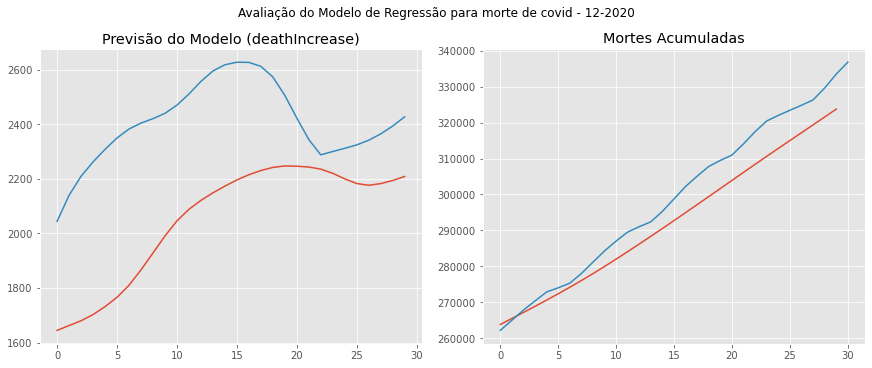

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5), constrained_layout=True)
ax1.plot(y_pred, label='Previsão')
ax1.plot(y_test, label='Real')
ax1.set_title('Previsão do Modelo (deathIncrease)')

ax2.plot(death[0]+np.cumsum(y_pred), label='Previsão')
ax2.plot(death.values, label='Real')
ax2.set_title('Mortes Acumuladas')

fig.suptitle('Avaliação do Modelo de Regressão para morte de covid - 12-2020')